# ΠΡΟΧΕΙΡΟ ΠΡΟΓΡΑΜΜΑ ΤΕΛΙΚΗΣ ΕΡΓΑΣΙΑΣ
Στο πρόγραμμα αυτό κάνω μια απόπειρα υλοποίησης του μοντέλου σε python. Κάνω όσο το δυνατόν πιο πολύ αναλυτικότατο σχολιασμό ώστε να είναι κατά το μέγιστο ευνόητα. Ως αναφορές πήρα τις σημειώσεις στην τάξη, καθώς και την εργασία _Modeling the stock market prior to large crashes_ του 1999 των __Johansen__ και __Sornette__ που εξηγεί περιληπτικά το μοντέλο

## IMPORTS
Το 1ο κελί είναι σχεδόν αποκλειστικά βοηθητικό και μη αναγκαίο για την πλήρη κατανόηση του μοντέλου. Το 1ο κελί εισάγει τις απαραίτητες βιβλιοθήκες για να τρέξει το πρόγραμμα. 
1. Η numpy είναι μαθηματική βιβλιοθήκη που ορίζει χρήσιμες συναρτήσεις για υπολογισμούς και διαχείριση πινάκων. 
2. Η pandas χρησιμοποιείται για τη διαχείριση δεδομένων (εισαγωγή, εξαγωγή, μορφοποίηση). 
3. Η matplotlib χρησιμοποιείται για τη μορφοποίηση και υλοποίηση διαγραμμάτων. 
4. Η datetime χρησιμοποιείται για τη διαχείριση ημερομηνιών ως δεδομένα
5. Η lppls είναι η βιβλιοθήκη που χρησιμοποιείται για το Log Periodic Power Law (LPPLS) fitting

In [1]:
# IMPORTS
import numpy as np
import pandas as pd
# import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from datetime import datetime as dt
# import seaborn as sns
# sns.set()
# from sklearn.cluster import KMeans
from lppls import lppls, data_loader
# import yfinance as yf

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

ImportError: numpy.core.multiarray failed to import

In [4]:
def lg_return(s):
    ###DOCSTRING Defines the log return for a stock price when it moves from s1 to s2###
    x = np.empty(len(s)-1)
    for i in range(1,len(s)):
        x[i-1] = np.log(s[i]) - np.log(s[i-1])
    return x


### ΔΗΜΙΟΥΡΓΙΑ ΧΡΟΝΟΣΕΙΡΑΣ ΚΑΙ FITTING
Στο σημείο αυτό κάνει load τη χρονοσειρά και δίνει το 1ο LPPLS Fitting. Η τιμή data είναι dataframe που περιλαμβάνει όλα τα δεδομένα από το Yahoo Finance, το time1 και το price1 είναι οι ημερομηνίες και τα Adj. Close της χρονοσειράς, ενώ το time και το price είναι οι ημερομηνίες σε ordinal μορφή, και οι Adj. Close τιμές. Από το documentation συστήνονται να χρησιμοποιούνται τα time & price.

Η τιμή observations είναι η χρονοσειρά που θα φιτάρει, ενώ το MAX_SEARCHES αντιπροσωπεύει το μέγιστο αριθμό από fits που χτυπάει σε κάθε κυλιόμενο παράθυρο. Η τιμή 25 συστήνεται από τη βιβλιογραφία. Ενδεχομένως να αξίζει να διερευνηθεί η βέλτιστη τιμή, αλλά το 25 φαίνεται σωστό.

In [5]:
# Time Series loading

# data = yf.download('BTC-USD')
data = pd.read_csv('BTC-USD.csv')
# time1 = data.index
time = np.array(data.loc[:,"Date"].to_list())
time1 = [dt.strptime(d,'%Y-%m-%d').date() for d in time]
# time = [pd.Timestamp.toordinal(t1) for t1 in data.index]
time = [pd.Timestamp.toordinal(dt.strptime(t1, '%Y-%m-%d')) for t1 in data['Date']]
price = np.log(data['Adj Close'].values)
price1 = data['Adj Close'].values
lg_price = lg_return(price1)

T Critical: 2032-02-07 00:00:00
M: 1.657605308567554
A: 14.038585481312237
W: 22.54480083679325





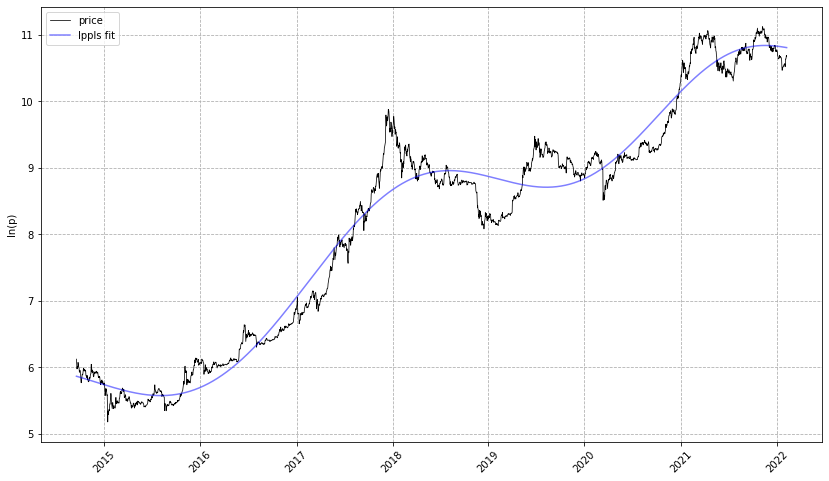

In [3]:
%matplotlib inline

observations = np.array([time[:], price[:]])
MAX_SEARCHES = 25
lppls_model = lppls.LPPLS(observations=observations)
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(MAX_SEARCHES)
print("T Critical: {}\nM: {}\nA: {}\nW: {}\n\n\n".format(dt.fromordinal(tc.astype(np.int64)),m,a,w))
lppls_model.plot_fit()

### PLOTS
Τα 2 παράθυρα που συμφωνήθηκε να διερευνηθούν σε 1η φάση είναι οι πρώτες 1400 τιμές στο 1ο, και οι υπόλοιπες στο 2ο. Αναλάβετε μεταξύ σας ποιος θα φτιάξει ποιο

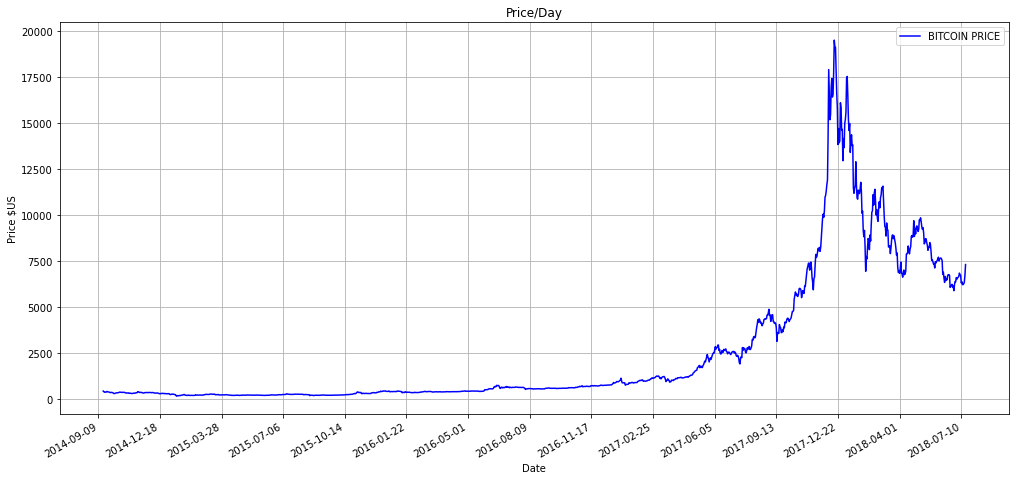

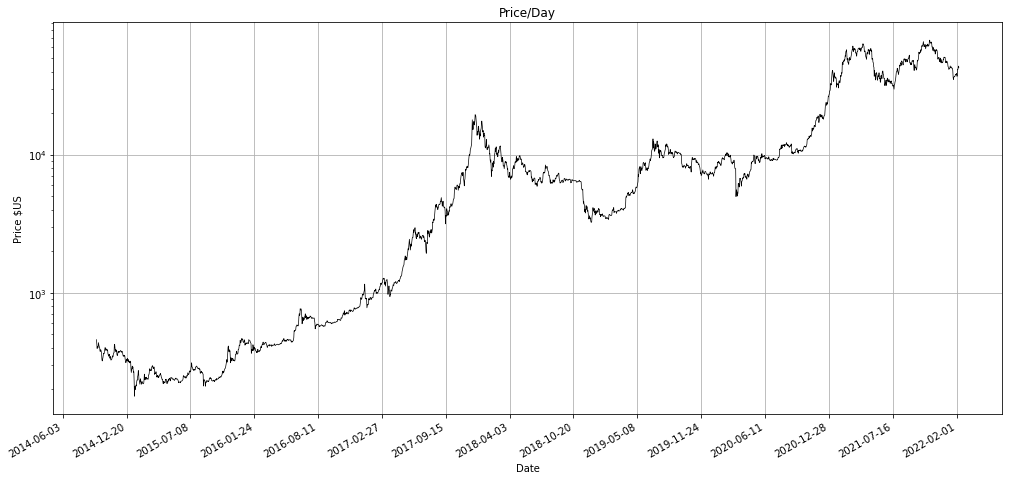

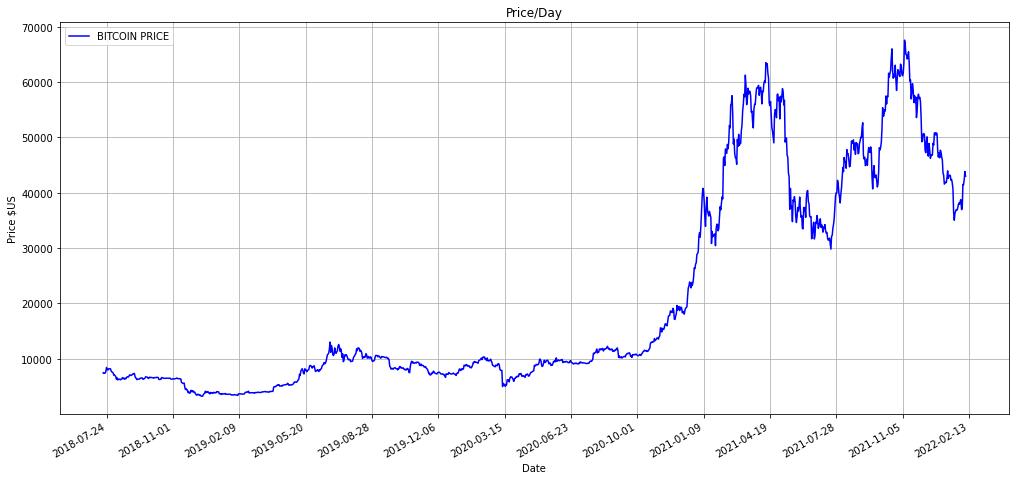

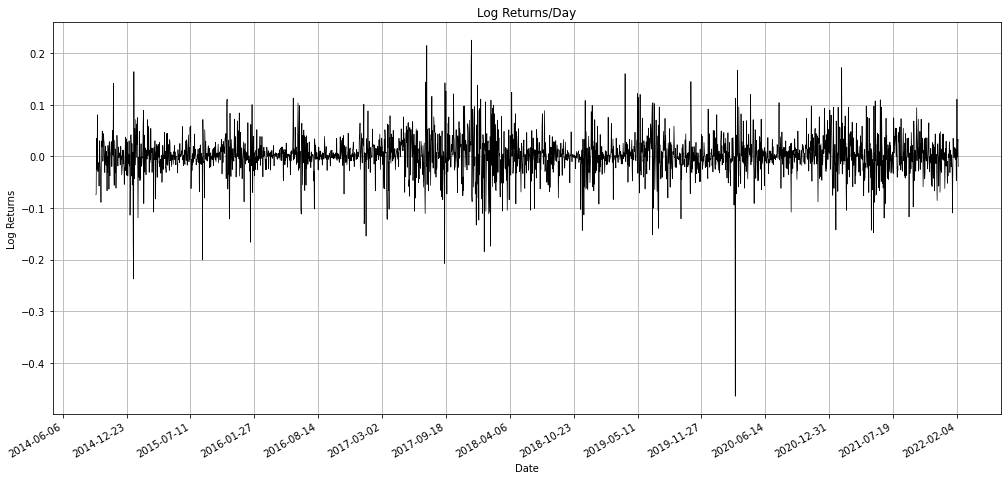

<Figure size 1224x576 with 0 Axes>

In [22]:
plt.rcParams['figure.figsize'] = [17,8]

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(time1[:1400],price1[:1400],color='b',label='BITCOIN PRICE')
plt.xlabel("Date")
plt.ylabel("Price $US")
plt.title("Price/Day")
plt.legend()
plt.grid()
plt.gcf().autofmt_xdate()
plt.show()
plt.clf()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=200))
plt.plot(time1,price1,color='black',label='BITCOIN PRICE',linewidth=0.7)
plt.yscale('log')
plt.xlabel("Date")
plt.ylabel("Price $US")
plt.title("Price/Day")
# plt.legend()
plt.grid()
plt.gcf().autofmt_xdate()
plt.savefig('./Figures/Log-Plot.jpg',bbox_inches='tight')
plt.show()
plt.clf()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.plot(time1[1401:],price1[1401:],color='b',label='BITCOIN PRICE')
plt.xlabel("Date")
plt.ylabel("Price $US")
plt.title("Price/Day")
plt.legend()
plt.grid()
plt.gcf().autofmt_xdate()
plt.show()
plt.clf()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=200))
plt.plot(time1[1:],lg_price,color='black',linewidth=0.7)
# plt.bar(time1[1:],lg_price,color='black',linewidth=0.1)
# plt.stem(time1[1:],lg_price,linefmt='--')
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.title("Log Returns/Day")
# plt.legend()
plt.grid()
plt.gcf().autofmt_xdate()
plt.savefig('./Figures/Log-Returns.jpg',bbox_inches='tight')
plt.show()
plt.clf()

plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

In [5]:
# # compute the confidence indicator
# res = lppls_model.mp_compute_nested_fits(
#     workers=8,
#     window_size=60, 
#     smallest_window_size=30,
#     outer_increment=1, 
#     inner_increment=5, 
#     max_searches=25,
#     # filter_conditions_config={} # not implemented in 0.6.x
# )

# lppls_model.plot_confidence_indicators(res)
# plt.savefig('conf_ind_{}.png'.format(60))
# # should give a plot like the following...

In [6]:
# res_df = lppls_model.compute_indicators(res)
# tc = []
# for i in res_df['_fits']:
#     column = []
#     for j in i:
#         if j['tc'] > pd.Timestamp.toordinal(pd.Timestamp.max) or j['tc'] <= 1: 
#             column.append(0)
#             continue
#         if type(j['tc'])!=type(1):
#             column.append(pd.Timestamp.fromordinal(j['tc'].astype(np.int64)))
#         else:
#             column.append(pd.Timestamp.fromordinal(j['tc']))
#     tc.append(column)

# np.savetxt('tc.csv',tc,delimiter=',',fmt='%s')
# gives the following...

### CONFIDENCE INDICATORS
Εδώ υπολογίζονται τα Confidence Indicators (αρνητικά, θετικά) και τοποθετούνται σε αρχεία csv. Να παίξουμε με τα window sizes __w__, και να δημιουργήσουμε ο καθένας τα αντίστοιχα αρχεία csv. Το μεγαλύτερο κομμάτι αυτού του κώδικα υπάρχει καθαρά για λόγους μορφοποίησης και δεν είναι 100% απαραίτητο για να δουλέψει το πρόγραμμα.

100%|██████████| 2223/2223 [3:49:39<00:00,  6.20s/it]  


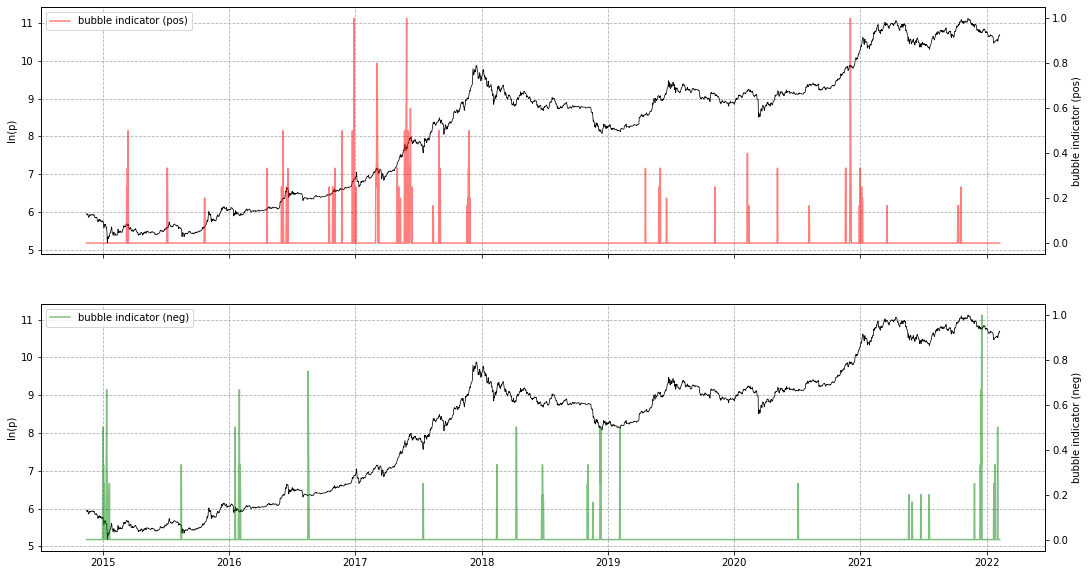

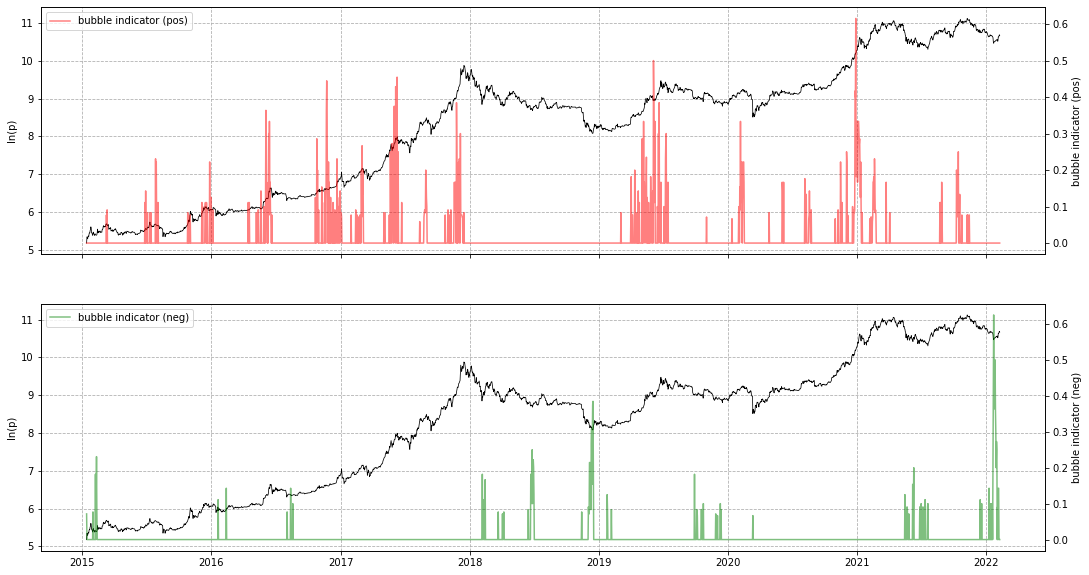

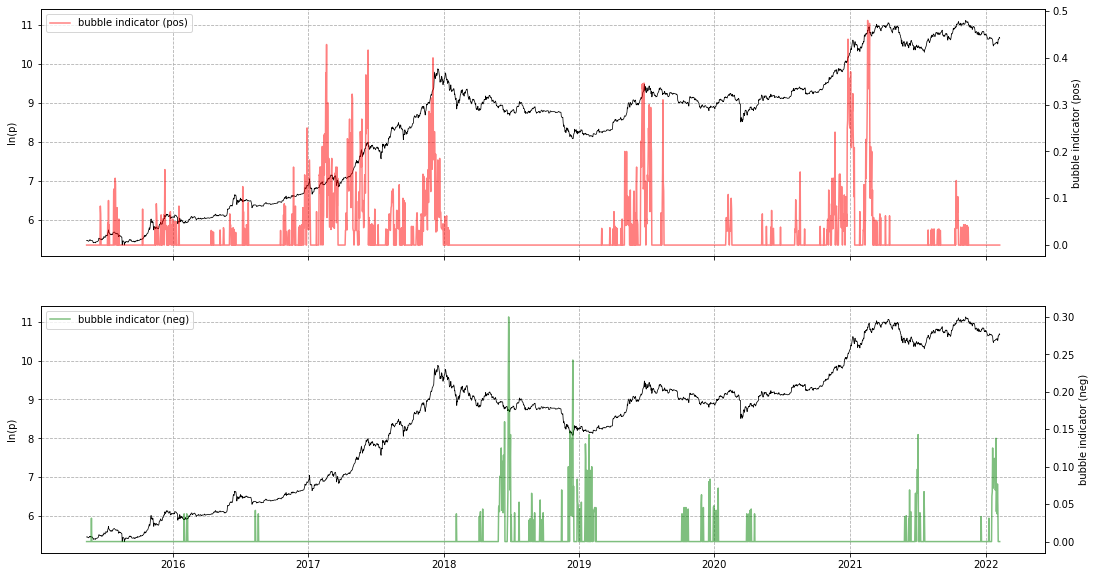

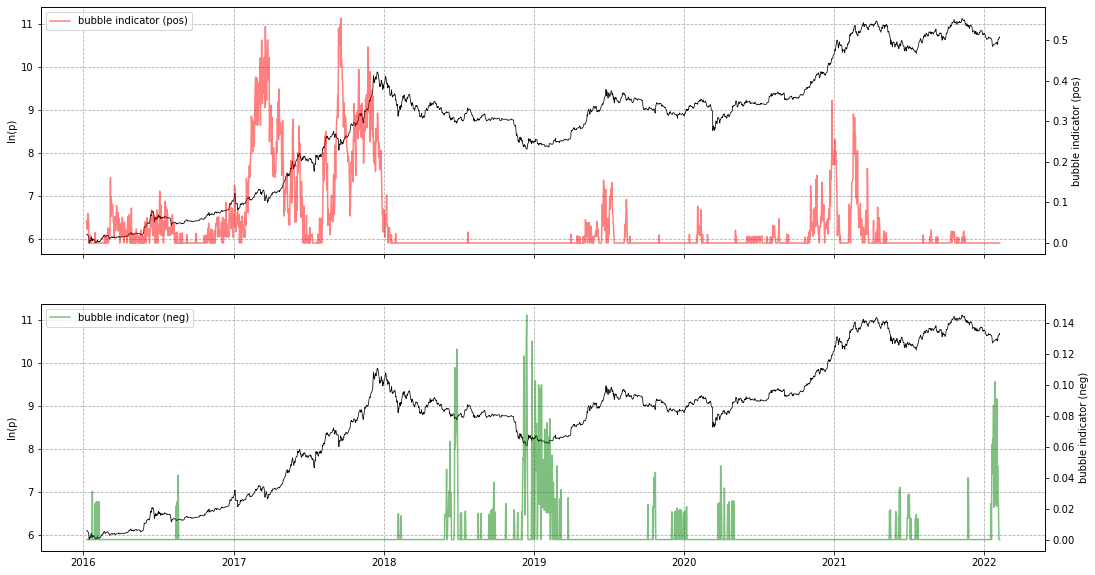

In [7]:
for w in [60,120,240,480]:
    res = lppls_model.mp_compute_nested_fits(
        workers=8,
        window_size=w, 
        smallest_window_size=30,
        outer_increment=1, 
        inner_increment=5, 
        max_searches=25,
        # filter_conditions_config={} # not implemented in 0.6.x
    )

    lppls_model.plot_confidence_indicators(res)
    plt.savefig('Figures/conf_ind_{}.jpg'.format(w))

    res_df = lppls_model.compute_indicators(res)

# CREATE RES AND TC CSV FILES FOR GIVEN WINDOW SIZE
    tc = []
    for i in res_df['_fits']:
        column = []
        for j in i:
            if j['tc'] > pd.Timestamp.toordinal(pd.Timestamp.max) or j['tc'] <= 1: 
                column.append(0)
                continue
            if type(j['tc'])!=type(1):
                column.append(pd.Timestamp.fromordinal(j['tc'].astype(np.int64)))
            else:
                column.append(pd.Timestamp.fromordinal(j['tc']))
        tc.append(column)

# CHANGE TIME VALUES IN RES_DF FROM ORDINAL TO TIMESTAMP
    d = {}
    for i in res_df['time']:
        d.update({int(i): pd.Timestamp.fromordinal(int(i))})
    res_df['time'] = res_df['time'].map(d)
    
    res_df.to_csv('res_{}.csv'.format(w))
    np.savetxt('tc_{}.csv'.format(w),tc,delimiter=',',fmt='%s')

In [8]:
# from lppls import lppls_cmaes
# lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations)
# tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=2500, pop_size=4)